# CS-484: Intro to ML - Assignment 2


### Author: Jorge Gonzalez Lopez
### CWID: A20474413
### Semester: Spring 2021

In [1]:
# IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy.linalg as sl
import sklearn.cluster as cluster
import sklearn.metrics as metrics

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

## Question 4

In [118]:
Cluster0 = [-2,-1,1,2,3]
Cluster1 = [4,5,7,8]
data = Cluster0 + Cluster1
data = np.vstack(data)


In [119]:
a_ij = 0
d_ij = 0

for i in Cluster0:
        if i != -1:
            a_ij += (np.linalg.norm(-1 - i) / (len(Cluster0)-1))
            
for i in Cluster1:
     d_ij += (np.linalg.norm(-1 - i) / (len(Cluster1)))
    
#Only two clusters
b_ij = d_ij

             
s_ij = (b_ij - a_ij) / np.maximum(a_ij, b_ij)

print('The Silhouette width of the observation 2 in Cluster 0 is: ' + str(s_ij))

The Silhouette width of the observation 2 in Cluster 0 is: 0.6428571428571429


In [120]:
cen_0 = np.mean(Cluster0)
cen_1 = np.mean(Cluster1)

In [121]:
S_0 = 0
S_1 = 0

for i in Cluster0:
     S_0 += (np.linalg.norm(cen_0 - i) / (len(Cluster0)))
            
for i in Cluster1:
     S_1 += (np.linalg.norm(cen_1 - i) / (len(Cluster1)))

M_kl = np.linalg.norm(cen_0 - cen_1) 
R_kl = (S_0 + S_1)/(M_kl)

R_0 = np.max(R_kl)
R_1 = np.max(R_kl)

print('The Davies-Bouldin value of cluster 0 is : '+ str(np.round(R_0, decimals=4))+ ' and of cluster 1 is: '+ str(np.round(R_1, decimals=4)))

The Davies-Bouldin value of cluster 0 is : 0.5889 and of cluster 1 is: 0.5889


In [122]:
DB = (R_0 + R_1) / 2

print('The Davies-Bouldin Index is: '+ str(np.round(DB, decimals=4)))

The Davies-Bouldin Index is: 0.5889


## Question 5

In [193]:
df = pd.read_csv('Groceries.csv')

In [194]:
# Get itemSets of all the customers
itemsets = df.groupby(['Customer'])['Item'].apply(list).values.tolist()

In [195]:
# Convert the Item List format to the Item Indicator format
te = TransactionEncoder()
te_ary = te.fit(itemsets).transform(itemsets)
item_ind = pd.DataFrame(te_ary, columns=te.columns_)

support = 75 / len(itemsets)
# Find the frequent itemsets
frequent = apriori(item_ind, min_support = support, use_colnames = True)

In [196]:
print('There are ' + str(len(frequent)) + ' itemsets in total.')

There are 524 itemsets in total.


In [197]:
largest_k = frequent['itemsets'].values[-1]

print('The larget k value among the itemsets is: ' + str(len(largest_k)))

The larget k value among the itemsets is: 4


In [218]:
# Association rules with a Coincidence metric greater or equal to 1%
coinc = 0.01
a_r = association_rules(frequent, metric = "confidence", min_threshold = coinc)

print('There are ' + str(len(a_r)) + ' association rules.')

There are 1228 association rules.


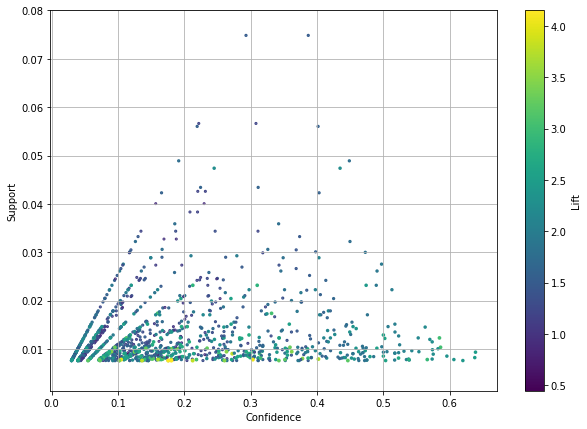

In [199]:
plt.figure(figsize=(10,7))
plt.colorbar(plt.scatter(a_r['confidence'], a_r['support'], a_r['lift'], a_r['lift'], linewidths=2), label= 'Lift')
plt.xlabel("Confidence")
plt.ylabel("Support")
plt.grid()
plt.show()

In [224]:
# Confidence >= 60 %
a_r2 = a_r[a_r['confidence'] >= 0.6]
print(a_r2[['antecedents', 'consequents','support', 'confidence', 'lift']])

                                      antecedents   consequents   support  \
727                     (root vegetables, butter)  (whole milk)  0.008236   
734                              (yogurt, butter)  (whole milk)  0.009354   
1200  (root vegetables, yogurt, other vegetables)  (whole milk)  0.007829   
1214   (yogurt, other vegetables, tropical fruit)  (whole milk)  0.007626   

      confidence      lift  
727     0.637795  2.496107  
734     0.638889  2.500387  
1200    0.606299  2.372842  
1214    0.619835  2.425816  


## Question 6

In [12]:
df = pd.read_csv('cars.csv')

In [13]:
input_var = ['Weight', 'Wheelbase', 'Length']
# Distance Manhattan
k_min = 2
k_max = 10
random_state = 60616

In [14]:
df_nn = df[input_var]

In [15]:
df[input_var] = 10*(df[input_var]-np.min(df[input_var]))/(np.max(df[input_var]) - np.min(df[input_var]))

In [ ]:
Elbow = []
Sil = []
Cal = []
Dav = []
wcss = []

for i in range(k_min, k_max+1):
    km = cluster.KMeans(n_clusters = i, random_state= random_state).fit(df[input_var])
    
    Sil.append(metrics.silhouette_score(df[input_var], km.labels_))
    Cal.append(metrics.calinski_harabasz_score(df[input_var], km.labels_))
    Dav.append(metrics.davies_bouldin_score(df[input_var], km.labels_))
        
    WCSS = np.zeros(i)
    nC = np.zeros(i)

    for j in range(df[input_var].shape[0]):
        k = km.labels_[j]
        nC[k] += 1
        diff = df[input_var].values[j] - km.cluster_centers_[k]
        WCSS[k] += diff.dot(diff)

    elb = 0
    TotalWCSS = 0
    for k in range(i):
        elb += WCSS[k] / nC[k]
        TotalWCSS += WCSS[k]
    
    Elbow.append(elb)
    wcss.append(TotalWCSS)
    

In [ ]:
print("K\t WCSS\t      Elbow Value \t    Silhouette values \t Calinski-Harabasz Scores\t Davies-Bouldin Index")
for c in range(k_min, k_max+1):
   print('{:.0f} \t {:.4f} \t {:.4f}  \t {:.4f}            \t {:.4f}                  \t {:.4f}'
         .format(c, wcss[c-2], Elbow[c-2], Sil[c-2], Cal[c-2], Dav[c-2]))


In [ ]:
plt.plot(np.arange(2,11), wcss, linewidth = 2, marker = 'o')
plt.grid(True)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS Value")
plt.xticks(np.arange(1, 10+1, step = 1))
plt.show()

plt.plot(np.arange(2,11), Elbow, linewidth = 2, marker = 'o')
plt.grid(True)
plt.xlabel("Number of Clusters")
plt.ylabel("Elbow Value")
plt.xticks(np.arange(1, 10+1, step = 1))
plt.show()

plt.plot(np.arange(2,11), Sil, linewidth = 2, marker = 'o')
plt.grid(True)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Value")
plt.xticks(np.arange(1, 10+1, step = 1))
plt.show()   

plt.plot(np.arange(2,11), Cal, linewidth = 2, marker = 'o')
plt.grid(True)
plt.xlabel("Number of Clusters")
plt.ylabel("Calinski-Harabasz Score")
plt.xticks(np.arange(1, 10+1, step = 1))
plt.show()

plt.plot(np.arange(2,11), Dav, linewidth = 2, marker = 'o')
plt.grid(True)
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Index")
plt.xticks(np.arange(1, 10+1, step = 1))
plt.show()   

In [ ]:
print('The suggested number of clusters is: ' + str(3))

In [210]:
km = cluster.KMeans(n_clusters = 3, random_state= random_state).fit(df_nn)

print("Cluster Centroid 0:", km.cluster_centers_[0])
print("Cluster Centroid 1:", km.cluster_centers_[1])
print("Cluster Centroid 2:", km.cluster_centers_[2])


Cluster Centroid 0: [3635.36206897  108.89655172  188.81896552]
Cluster Centroid 1: [4874.36764706  118.97058824  201.42647059]
Cluster Centroid 2: [2785.1796875  101.0625     173.90625  ]
